In [5]:
import numpy as np
import tensorflow as tf
import imutils as imutils
from tqdm import tqdm
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.image as mpimg
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sn
from matplotlib import pyplot as plt
import os
import glob
import cv2
import pickle
import joblib
from PIL import Image

## 데이터 준비하기

In [165]:
datas = glob.glob("./dataz/*/*.jpg")

In [166]:
X = []
Y = []
dc = {'False' : 0, 'True' : 1}
for data in datas:
    img = cv2.imread(data)
    print(data)
    img = cv2.resize(img, (224, 224))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = np.array(img)
    X.append(img)
    label = data.split("\\")[1]
    Y.append(dc[label])

./dataz\False\afternoon_building124.jpg
./dataz\False\afternoon_building144.jpg
./dataz\False\afternoon_building153.jpg
./dataz\False\afternoon_building159.jpg
./dataz\False\afternoon_building165.jpg
./dataz\False\afternoon_building178.jpg
./dataz\False\afternoon_building18.jpg
./dataz\False\afternoon_building199.jpg
./dataz\False\afternoon_building55.jpg
./dataz\False\afternoon_building90.jpg
./dataz\False\afternoon_building96.jpg
./dataz\False\afternoon_building98.jpg
./dataz\False\afternoon_city21.jpg
./dataz\False\afternoon_city32.jpg
./dataz\False\afternoon_city39.jpg
./dataz\False\afternoon_city42.jpg
./dataz\False\afternoon_city53.jpg
./dataz\False\afternoon_city63.jpg
./dataz\False\afternoon_city7.jpg
./dataz\False\afternoon_city70.jpg
./dataz\False\afternoon_city75.jpg
./dataz\False\afternoon_park10.jpg
./dataz\False\afternoon_park21.jpg
./dataz\False\afternoon_park40.jpg
./dataz\False\afternoon_park51.jpg
./dataz\False\afternoon_park57.jpg
./dataz\False\afternoon_park60.jpg
.

./dataz\False\autumncityscape221.jpg
./dataz\False\autumncityscape224.jpg
./dataz\False\autumncityscape226.jpg
./dataz\False\autumncityscape229.jpg
./dataz\False\autumncityscape23.jpg
./dataz\False\autumncityscape230.jpg
./dataz\False\autumncityscape233.jpg
./dataz\False\autumncityscape235.jpg
./dataz\False\autumncityscape240.jpg
./dataz\False\autumncityscape244.jpg
./dataz\False\autumncityscape254.jpg
./dataz\False\autumncityscape255.jpg
./dataz\False\autumncityscape256.jpg
./dataz\False\autumncityscape257.jpg
./dataz\False\autumncityscape260.jpg
./dataz\False\autumncityscape263.jpg
./dataz\False\autumncityscape264.jpg
./dataz\False\autumncityscape265.jpg
./dataz\False\autumncityscape273.jpg
./dataz\False\autumncityscape276.jpg
./dataz\False\autumncityscape277.jpg
./dataz\False\autumncityscape278.jpg
./dataz\False\autumncityscape287.jpg
./dataz\False\autumncityscape290.jpg
./dataz\False\autumncityscape292.jpg
./dataz\False\autumncityscape294.jpg
./dataz\False\autumncityscape30.jpg
./d

./dataz\False\autumnforest333.jpg
./dataz\False\autumnforest34.jpg
./dataz\False\autumnforest356.jpg
./dataz\False\autumnforest358.jpg
./dataz\False\autumnforest360.jpg
./dataz\False\autumnforest37.jpg
./dataz\False\autumnforest393.jpg
./dataz\False\autumnforest408.jpg
./dataz\False\autumnforest412.jpg
./dataz\False\autumnforest415.jpg
./dataz\False\autumnforest426.jpg
./dataz\False\autumnforest433.jpg
./dataz\False\autumnforest441.jpg
./dataz\False\autumnforest448.jpg
./dataz\False\autumnforest461.jpg
./dataz\False\autumnforest466.jpg
./dataz\False\autumnforest473.jpg
./dataz\False\autumnforest484.jpg
./dataz\False\autumnforest488.jpg
./dataz\False\autumnforest493.jpg
./dataz\False\autumnforest516.jpg
./dataz\False\autumnforest528.jpg
./dataz\False\autumnforest545.jpg
./dataz\False\autumnforest547.jpg
./dataz\False\autumnforest549.jpg
./dataz\False\autumnforest552.jpg
./dataz\False\autumnforest561.jpg
./dataz\False\autumnforest570.jpg
./dataz\False\autumnforest571.jpg
./dataz\False\au

./dataz\False\autumnseasonphoto712.jpg
./dataz\False\autumnseasonphoto721.jpg
./dataz\False\autumnseasonphoto722.jpg
./dataz\False\autumnseasonphoto729.jpg
./dataz\False\autumnseasonphoto733.jpg
./dataz\False\autumnseasonphoto744.jpg
./dataz\False\autumnseasonphoto747.jpg
./dataz\False\autumnseasonphoto771.jpg
./dataz\False\autumnseasonphoto772.jpg
./dataz\False\autumnseasonphoto773.jpg
./dataz\False\autumnseasonphoto795.jpg
./dataz\False\autumnseasonphoto798.jpg
./dataz\False\autumnseasonphoto799.jpg
./dataz\False\autumnseasonphoto804.jpg
./dataz\False\autumnseasonphoto854.jpg
./dataz\False\autumnseasonphoto856.jpg
./dataz\False\autumnseasonphoto869.jpg
./dataz\False\autumnseasonphoto870.jpg
./dataz\False\autumnseasonphoto872.jpg
./dataz\False\autumnseasonphoto874.jpg
./dataz\False\autumnseasonphoto880.jpg
./dataz\False\autumnseasonphoto883.jpg
./dataz\False\autumnseasonphoto884.jpg
./dataz\False\autumnseasonphoto953.jpg
./dataz\False\autumnseasonphoto955.jpg
./dataz\False\autumnseaso

./dataz\False\autumn_streetview170.jpg
./dataz\False\autumn_streetview193.jpg
./dataz\False\autumn_streetview209.jpg
./dataz\False\autumn_streetview228.jpg
./dataz\False\autumn_streetview234.jpg
./dataz\False\autumn_streetview24.jpg
./dataz\False\autumn_streetview244.jpg
./dataz\False\autumn_streetview253.jpg
./dataz\False\autumn_streetview259.jpg
./dataz\False\autumn_streetview265.jpg
./dataz\False\autumn_streetview270.jpg
./dataz\False\autumn_streetview28.jpg
./dataz\False\autumn_streetview295.jpg
./dataz\False\autumn_streetview299.jpg
./dataz\False\autumn_streetview51.jpg
./dataz\False\autumn_streetview93.jpg
./dataz\False\springbuilding10.jpg
./dataz\False\springbuilding102.jpg
./dataz\False\springbuilding112.jpg
./dataz\False\springbuilding113.jpg
./dataz\False\springbuilding118.jpg
./dataz\False\springbuilding120.jpg
./dataz\False\springbuilding125.jpg
./dataz\False\springbuilding130.jpg
./dataz\False\springbuilding136.jpg
./dataz\False\springbuilding139.jpg
./dataz\False\springb

./dataz\False\springforest568.jpg
./dataz\False\springforest57.jpg
./dataz\False\springforest578.jpg
./dataz\False\springforest580.jpg
./dataz\False\springforest581.jpg
./dataz\False\springforest582.jpg
./dataz\False\springforest585.jpg
./dataz\False\springforest599.jpg
./dataz\False\springforest601.jpg
./dataz\False\springforest606.jpg
./dataz\False\springforest608.jpg
./dataz\False\springforest620.jpg
./dataz\False\springforest621.jpg
./dataz\False\springforest622.jpg
./dataz\False\springforest627.jpg
./dataz\False\springforest628.jpg
./dataz\False\springforest639.jpg
./dataz\False\springforest645.jpg
./dataz\False\springforest648.jpg
./dataz\False\springforest663.jpg
./dataz\False\springforest664.jpg
./dataz\False\springforest674.jpg
./dataz\False\springforest680.jpg
./dataz\False\springforest682.jpg
./dataz\False\springforest690.jpg
./dataz\False\springforest692.jpg
./dataz\False\springforest694.jpg
./dataz\False\springforest706.jpg
./dataz\False\springforest762.jpg
./dataz\False\s

./dataz\True\4063131.jpg
./dataz\True\4063136.jpg
./dataz\True\4063141.jpg
./dataz\True\4063143.jpg
./dataz\True\4063147.jpg
./dataz\True\4063156.jpg
./dataz\True\4063161.jpg
./dataz\True\4271417.jpg
./dataz\True\4296244.jpg
./dataz\True\4296271.jpg
./dataz\True\4296284.jpg
./dataz\True\4296287.jpg
./dataz\True\4296294.jpg
./dataz\True\4296297.jpg
./dataz\True\4307443.jpg
./dataz\True\4307702.jpg
./dataz\True\4318393.jpg
./dataz\True\4318401.jpg
./dataz\True\4318428.jpg
./dataz\True\4318496.jpg
./dataz\True\4384063.jpg
./dataz\True\4414311.jpg
./dataz\True\4414314.jpg
./dataz\True\4414316.jpg
./dataz\True\4414346.jpg
./dataz\True\4559604.jpg
./dataz\True\4559606.jpg
./dataz\True\4559607.jpg
./dataz\True\4559912.jpg
./dataz\True\4559913.jpg
./dataz\True\4559915.jpg
./dataz\True\4560247.jpg
./dataz\True\4611670.jpg
./dataz\True\4614232.jpg
./dataz\True\4650733.jpg
./dataz\True\4656.jpg
./dataz\True\4739732.jpg
./dataz\True\4744453.jpg
./dataz\True\4803323.jpg
./dataz\True\481877.jpg
./da

./dataz\True\clear_park17.jpg
./dataz\True\clear_park186.jpg
./dataz\True\clear_park193.jpg
./dataz\True\clear_park221.jpg
./dataz\True\clear_park3.jpg
./dataz\True\clear_park43.jpg
./dataz\True\clear_park44.jpg
./dataz\True\clear_park56.jpg
./dataz\True\clear_park57.jpg
./dataz\True\clear_park62.jpg
./dataz\True\clear_park70.jpg
./dataz\True\clear_park8.jpg
./dataz\True\clear_park80.jpg
./dataz\True\clear_streetview1.jpg
./dataz\True\clear_streetview14.jpg
./dataz\True\clear_streetview2.jpg
./dataz\True\clear_streetview21.jpg
./dataz\True\clear_streetview3.jpg
./dataz\True\clear_streetview37.jpg
./dataz\True\clear_streetview44.jpg
./dataz\True\clear_streetview7.jpg
./dataz\True\clear_streetview8.jpg
./dataz\True\cloudy_building1.jpg
./dataz\True\cloudy_building13.jpg
./dataz\True\cloudy_building17.jpg
./dataz\True\cloudy_building21.jpg
./dataz\True\cloudy_building36.jpg
./dataz\True\cloudy_building47.jpg
./dataz\True\cloudy_building56.jpg
./dataz\True\cloudy_building6.jpg
./dataz\True

./dataz\True\night_streetview116.jpg
./dataz\True\night_streetview122.jpg
./dataz\True\night_streetview140.jpg
./dataz\True\night_streetview142.jpg
./dataz\True\night_streetview143.jpg
./dataz\True\night_streetview15.jpg
./dataz\True\night_streetview153.jpg
./dataz\True\night_streetview167.jpg
./dataz\True\night_streetview175.jpg
./dataz\True\night_streetview2.jpg
./dataz\True\night_streetview204.jpg
./dataz\True\night_streetview216.jpg
./dataz\True\night_streetview222.jpg
./dataz\True\night_streetview245.jpg
./dataz\True\night_streetview247.jpg
./dataz\True\night_streetview258.jpg
./dataz\True\night_streetview276.jpg
./dataz\True\night_streetview278.jpg
./dataz\True\night_streetview279.jpg
./dataz\True\night_streetview296.jpg
./dataz\True\night_streetview335.jpg
./dataz\True\night_streetview336.jpg
./dataz\True\night_streetview339.jpg
./dataz\True\night_streetview6.jpg
./dataz\True\night_streetview60.jpg
./dataz\True\night_streetview68.jpg
./dataz\True\night_streetview77.jpg
./dataz\T

./dataz\True\spring_park10.jpg
./dataz\True\spring_park100.jpg
./dataz\True\spring_park101.jpg
./dataz\True\spring_park102.jpg
./dataz\True\spring_park103.jpg
./dataz\True\spring_park104.jpg
./dataz\True\spring_park108.jpg
./dataz\True\spring_park11.jpg
./dataz\True\spring_park110.jpg
./dataz\True\spring_park111.jpg
./dataz\True\spring_park115.jpg
./dataz\True\spring_park118.jpg
./dataz\True\spring_park119.jpg
./dataz\True\spring_park120.jpg
./dataz\True\spring_park121.jpg
./dataz\True\spring_park122.jpg
./dataz\True\spring_park123.jpg
./dataz\True\spring_park124.jpg
./dataz\True\spring_park130.jpg
./dataz\True\spring_park137.jpg
./dataz\True\spring_park14.jpg
./dataz\True\spring_park140.jpg
./dataz\True\spring_park150.jpg
./dataz\True\spring_park152.jpg
./dataz\True\spring_park153.jpg
./dataz\True\spring_park156.jpg
./dataz\True\spring_park158.jpg
./dataz\True\spring_park16.jpg
./dataz\True\spring_park17.jpg
./dataz\True\spring_park185.jpg
./dataz\True\spring_park19.jpg
./dataz\True\s

./dataz\True\sunrise_lake16.jpg
./dataz\True\sunrise_lake192.jpg
./dataz\True\sunrise_lake21.jpg
./dataz\True\sunrise_lake25.jpg
./dataz\True\sunrise_lake27.jpg
./dataz\True\sunrise_lake29.jpg
./dataz\True\sunrise_lake41.jpg
./dataz\True\sunrise_lake44.jpg
./dataz\True\sunrise_lake45.jpg
./dataz\True\sunrise_lake49.jpg
./dataz\True\sunrise_lake51.jpg
./dataz\True\sunrise_lake52.jpg
./dataz\True\sunrise_lake54.jpg
./dataz\True\sunrise_lake55.jpg
./dataz\True\sunrise_lake59.jpg
./dataz\True\sunrise_lake6.jpg
./dataz\True\sunrise_lake60.jpg
./dataz\True\sunrise_lake62.jpg
./dataz\True\sunrise_lake65.jpg
./dataz\True\sunrise_lake7.jpg
./dataz\True\sunrise_lake70.jpg
./dataz\True\sunrise_lake75.jpg
./dataz\True\sunrise_lake8.jpg
./dataz\True\sunrise_lake83.jpg
./dataz\True\sunrise_lake96.jpg
./dataz\True\sunrise_lake97.jpg
./dataz\True\sunrise_park7.jpg
./dataz\True\sunrise_park70.jpg
./dataz\True\sunrise_streetview1.jpg
./dataz\True\sunrise_streetview108.jpg
./dataz\True\sunrise_streetview

In [167]:
X = np.array(X)
Y = np.array(Y)

In [168]:
X.shape

(2723, 224, 224, 3)

In [169]:
trainData, testData, trainLabel, testLabel = train_test_split(X, Y, test_size = 0.2, shuffle=True, random_state = 42)

trainLabel = trainLabel[..., tf.newaxis]
testLabel = testLabel[..., tf.newaxis]

In [173]:
trainData.shape, trainLabel.shape, testData.shape, testLabel.shape
numTrain  = trainData.shape[0]
numTest = testData.shape[0]

In [174]:
unique, counts = np.unique(np.reshape(trainLabel, (numTrain, )), axis = -1, return_counts = True)
dict(zip(unique, counts))

{0: 1067, 1: 1111}

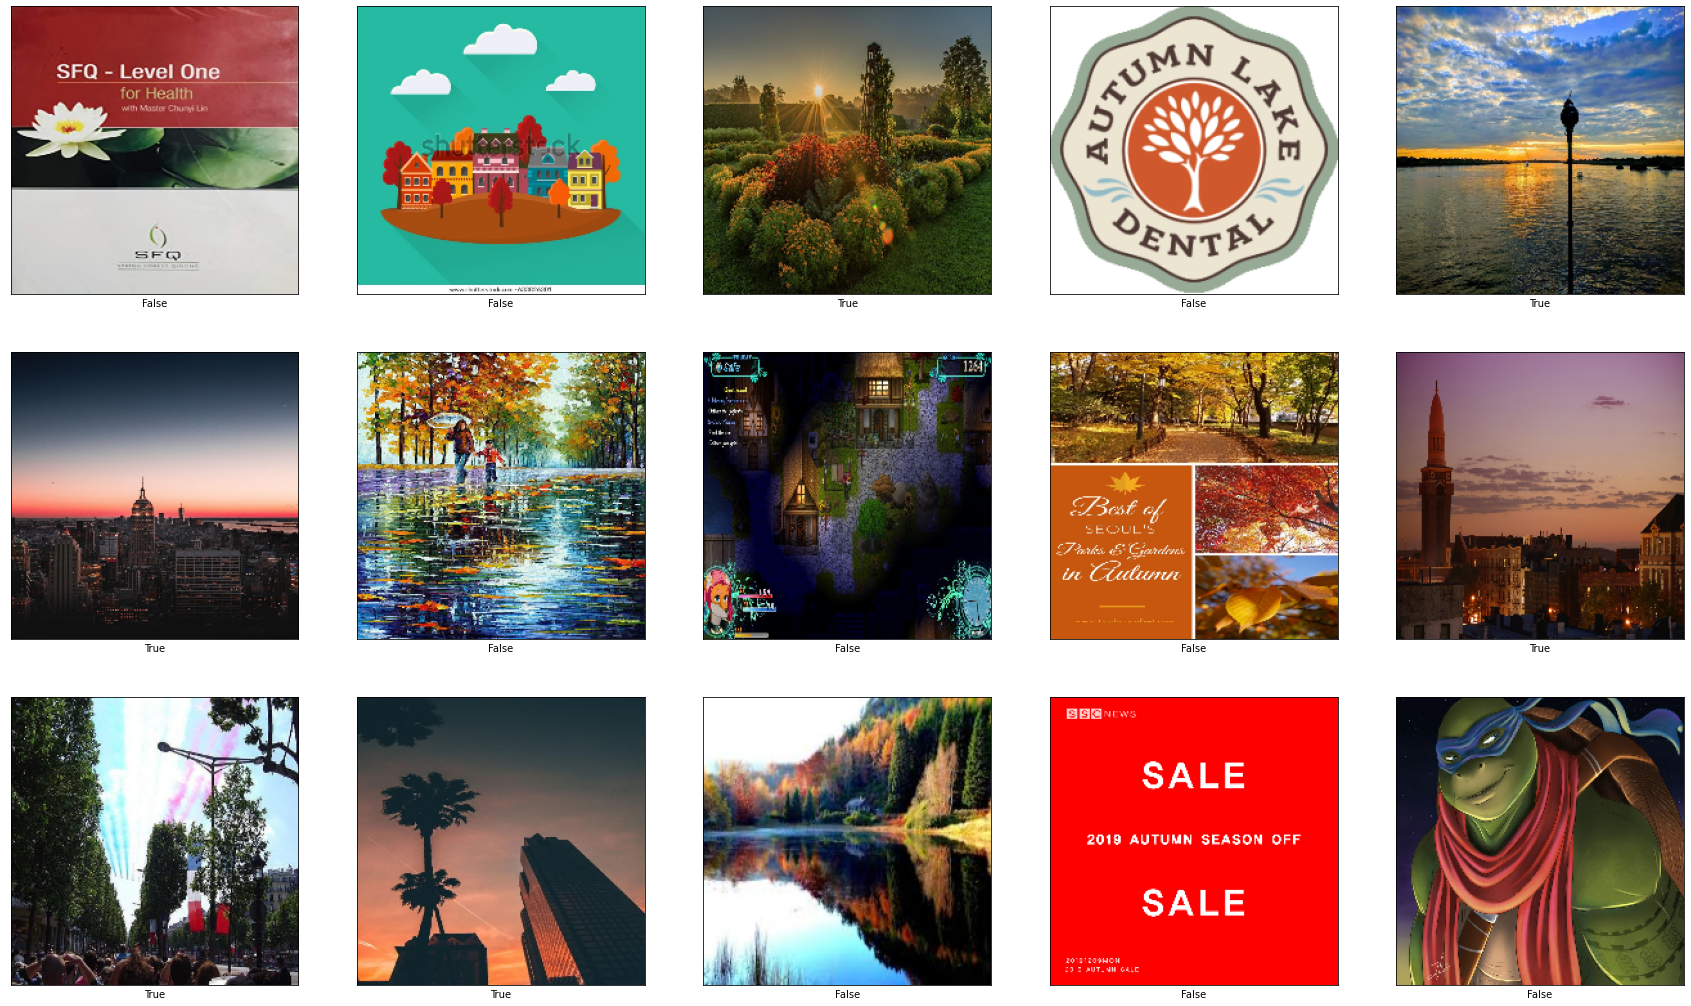

In [186]:
plt.figure(figsize = (30, 18))
for i in range(15):
    img_idx = np.random.randint(0, numTrain)
    plt.subplot(3,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(trainData[img_idx])
    plt.xlabel("True" if trainLabel[img_idx] else "False")

In [150]:
trainData = trainData.astype(np.float32) / 255.
testData = testData.astype(np.float32) / 255.

In [13]:
#Set Hyperparameter
lr = 0.05
EPOCHS = 40
IMG_SIZE =(224, 224)
BATCH = 100
CLASS = 2
steps_per_epoch = numTrain//BATCH
validation_steps = numTest//BATCH

NameError: name 'numTrain' is not defined

In [178]:
train_dataset = tf.data.Dataset.from_tensor_slices((trainData, trainLabel)).shuffle(buffer_size=numTrain).batch(BATCH).repeat()
test_dataset = tf.data.Dataset.from_tensor_slices((testData, testLabel)).batch(BATCH)

## 학습 모델 만들기

### xception model transfer learning

In [139]:
base_model = tf.keras.applications.xception.Xception(include_top = False, weights = 'imagenet', input_shape = (224, 224, 3))

In [140]:
base_model.trainable = False

In [141]:
inputs = keras.Input(shape=(224, 224, 3))
x = base_model(inputs, training=False)
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(512, activation = 'relu')(x)
x = keras.layers.Dense(256, activation = 'relu')(x)
x = keras.layers.Dense(128, activation = 'relu')(x)
outputs = keras.layers.Dense(1, activation = 'softmax')(x)
model = keras.Model(inputs, outputs)

In [142]:
model.summary()

Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_24 (InputLayer)        [(None, 224, 224, 3)]     0         
_________________________________________________________________
xception (Functional)        (None, 7, 7, 2048)        20861480  
_________________________________________________________________
flatten_5 (Flatten)          (None, 100352)            0         
_________________________________________________________________
dense_28 (Dense)             (None, 512)               51380736  
_________________________________________________________________
dense_29 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_30 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 129

In [143]:
model.compile(optimizer=keras.optimizers.Adam(lr),
              loss=keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[keras.metrics.BinaryAccuracy()])

history = model.fit(train_dataset, epochs = EPOCHS, steps_per_epoch = steps_per_epoch, validation_data = test_dataset, validation_steps = validation_steps)

Epoch 1/40


C:\Users\khyog\anaconda3\envs\lab\lib\site-packages\tensorflow\python\keras\backend.py:5016: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  warnings.warn(


40/40 [==============================] - 14s 248ms/step - loss: 1219.7035 - binary_accuracy: 0.3990 - val_loss: 3.4417 - val_binary_accuracy: 0.4250
Epoch 2/40
40/40 [==============================] - 9s 228ms/step - loss: 3.5419 - binary_accuracy: 0.3974 - val_loss: 0.7565 - val_binary_accuracy: 0.4250oss: 4.8986 - 
Epoch 3/40
40/40 [==============================] - 9s 224ms/step - loss: 0.8603 - binary_accuracy: 0.3994 - val_loss: 0.3485 - val_binary_accuracy: 0.4250
Epoch 4/40


KeyboardInterrupt: 

### VGG16 model transfer learning

In [179]:
base_model = tf.keras.applications.VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=IMG_SIZE + (3,)
)

model = tf.keras.models.Sequential()
model.add(base_model)
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.layers[0].trainable = False

model.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(lr=0.01),
    metrics=['accuracy']
)

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_9 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 25088)             0         
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 25089     
Total params: 14,739,777
Trainable params: 25,089
Non-trainable params: 14,714,688
_________________________________________________________________


C:\Users\khyog\anaconda3\envs\lab\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [180]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    mode='max',
    patience=5
)

history = model.fit_generator(
    train_dataset,
    steps_per_epoch=steps_per_epoch,
    epochs=EPOCHS,
    validation_data=test_dataset,
    validation_steps=validation_steps,
    callbacks=[early_stopping]
)

C:\Users\khyog\anaconda3\envs\lab\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/40
21/21 [==============================] - 26s 547ms/step - loss: 12.8004 - accuracy: 0.8529 - val_loss: 10.0117 - val_accuracy: 0.9240
Epoch 2/40
21/21 [==============================] - 21s 509ms/step - loss: 3.8268 - accuracy: 0.9615 - val_loss: 8.1443 - val_accuracy: 0.9380
Epoch 3/40
21/21 [==============================] - 11s 538ms/step - loss: 1.4008 - accuracy: 0.9798 - val_loss: 6.9324 - val_accuracy: 0.9460
Epoch 4/40
21/21 [==============================] - 11s 542ms/step - loss: 1.2272 - accuracy: 0.9798 - val_loss: 7.7963 - val_accuracy: 0.9420
Epoch 5/40
21/21 [==============================] - 11s 540ms/step - loss: 0.9475 - accuracy: 0.9817 - val_loss: 8.6701 - val_accuracy: 0.9400
Epoch 6/40
21/21 [==============================] - 11s 532ms/step - loss: 0.8966 - accuracy: 0.9841 - val_loss: 8.9178 - val_accuracy: 0.9340
Epoch 7/40
21/21 [==============================] - 11s 527ms/step - loss: 0.8352 - accuracy: 0.9851 - val_loss: 11.1233 - val_accuracy: 0.9

In [196]:
# save model
model.save("model.h5")

 ## Evaluate

In [26]:
IMG_SIZE =(224, 224)
def preprocess_imgs(path, img_size):
    set_new = []
    for img in os.listdir(path):
        img = cv2.imread(path + "/" + img)
        print(img.shape)
        img = cv2.resize(
            img,
            dsize=img_size,
            interpolation=cv2.INTER_CUBIC
        )
        set_new.append(tf.keras.applications.vgg16.preprocess_input(img))
    
    return np.array(set_new)

Test_Path = './tmp'
test_data = preprocess_imgs(Test_Path, img_size=IMG_SIZE)
print(test_data.shape)
reality = [1] * 13

# for img in os.listdir(Test_Path):
#     reality.append(1) if value.lower() == "hemmorhage_data" else reality.append(0)
        
predictions = model.predict(test_data)
print(predictions)
predictions = [1 if x > 0.5 else 0 for x in predictions]

accuracy = accuracy_score(reality, predictions)
print("Test Accuracy:", accuracy)

(1500, 1000, 3)
(1492, 2000, 3)
(734, 1125, 3)
(1000, 2200, 3)
(512, 910, 3)
(643, 1024, 3)
(1200, 1200, 3)
(800, 1280, 3)
(1500, 1500, 3)
(550, 1100, 3)
(1067, 1600, 3)
(1200, 1800, 3)
(1199, 1800, 3)
(13, 224, 224, 3)
[[1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [8.2589278e-28]
 [1.1132165e-12]
 [1.0000000e+00]
 [1.0000000e+00]]
Test Accuracy: 0.8461538461538461


In [2]:
model = tf.keras.models.load_model('model.h5')

In [3]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_9 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 25088)             0         
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 25089     
Total params: 14,739,777
Trainable params: 25,089
Non-trainable params: 14,714,688
_________________________________________________________________


In [40]:
image = Image.open("./tmp/building2.jpg")

In [41]:
image.size

(1024, 643)

In [42]:
imgnp = np.array(image)

In [43]:
imgnp.shape

(643, 1024, 3)

In [44]:
mg = cv2.resize(imgnp, dsize = (224, 224), interpolation = cv2.INTER_CUBIC)

In [45]:
mg = tf.keras.applications.vgg16.preprocess_input(mg)

In [50]:
prediction = model.predict(mg)

In [47]:
mg = np.reshape(mg, (1, 224, 224, 3))

In [48]:
mg.shape

(1, 224, 224, 3)

In [51]:
prediction

array([[1.]], dtype=float32)